<a href="https://colab.research.google.com/github/Cinq-hr/Portfolio-Optimization/blob/main/Portfolio_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN','BRK-B','TSLA','NVDA','KMX','F']  #

data = yf.download(tickers, start="2020-01-01", end="2023-01-01")['Close']

data.head()

[*********************100%***********************]  9 of 9 completed


Ticker,AAPL,AMZN,BRK-B,F,GOOG,KMX,MSFT,NVDA,TSLA
Date,,,,,,,,,
2020-01-02,72.716072,94.900497,228.389999,7.309789,68.046204,89.510002,153.323257,5.972160,28.684000
2020-01-03,72.009132,93.748497,226.179993,7.146832,67.712280,87.260002,151.414124,5.876571,29.534000
2020-01-06,72.582893,95.143997,226.990005,7.108033,69.381874,87.050003,151.805527,5.901216,30.102667
2020-01-07,72.241554,95.343002,225.919998,7.177871,69.338585,87.230003,150.421356,5.972660,31.270666
2020-01-08,73.403656,94.598503,225.990005,7.177871,69.884995,87.080002,152.817337,5.983861,32.809334


In [ ]:
returns = data.pct_change().dropna()
returns.head()

Ticker,AAPL,AMZN,BRK-B,F,GOOG,KMX,MSFT,NVDA,TSLA
Date,,,,,,,,,
2020-01-03,-0.009722,-0.012139,-0.009676,-0.022293,-0.004907,-0.025137,-0.012452,-0.016006,0.029633
2020-01-06,0.007968,0.014886,0.003581,-0.005429,0.024657,-0.002407,0.002585,0.004194,0.019255
2020-01-07,-0.004703,0.002092,-0.004714,0.009825,-0.000624,0.002068,-0.009118,0.012107,0.038801
2020-01-08,0.016086,-0.007809,0.000310,0.000000,0.007880,-0.001720,0.015928,0.001875,0.049205
2020-01-09,0.021240,0.004799,0.011770,0.001081,0.011044,0.005971,0.012493,0.010983,-0.021945


In [ ]:

mean_returns = returns.mean()

cov_matrix = returns.cov()

In [ ]:

risk_free_rate = 0.02

sharpe_ratio_threshold = 0.7

# Simulate portfolios
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
weights_record = []

underperforming_count = 0
top_performing_portfolios = []

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)  # Normalize the weights so they add up to 1
    weights_record.append(weights)

    # Calculate the portfolio's expected return and volatility
    portfolio_return = np.dot(weights, mean_returns) * 252  # Annualize return
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 252, weights)))  # Annualize volatility

    # Adjust the Sharpe ratio calculation with the risk-free rate
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility

    # Save the results for plotting
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe_ratio

    # Check if the portfolio is underperforming
    if sharpe_ratio < sharpe_ratio_threshold:
        underperforming_count += 1

    # Store the portfolio number (i), return, volatility, Sharpe ratio, and weights for sorting later
    top_performing_portfolios.append((i, portfolio_return, portfolio_volatility, sharpe_ratio, weights))

# Sort the portfolios by Sharpe ratio in descending order to get the best performers
top_performing_portfolios = sorted(top_performing_portfolios, key=lambda x: x[3], reverse=True)

# Get the top 5 best-performing portfolios
top_5_portfolios = top_performing_portfolios[:5]

# Display the results
print(f"Number of underperforming portfolios: {underperforming_count}")

print("\nTop 5 best-performing portfolios:")
for idx, (portfolio_index, portfolio_return, portfolio_volatility, sharpe_ratio, weights) in enumerate(top_5_portfolios):
    print(f"\nPortfolio {portfolio_index + 1}:")  # Portfolio number keeps its original index (e.g., 3605)
    print(f"  Return: {portfolio_return:.2f}%")
    print(f"  Volatility: {portfolio_volatility:.2f}%")
    print(f"  Sharpe Ratio: {sharpe_ratio:.2f}")

    # Show the associated stocks with their weights and percentage
    print("  Stocks and their weights (%):")
    for i, weight in enumerate(weights):
        print(f"    {tickers[i]}: {weight * 100:.2f}%")

Number of underperforming portfolios: 6717

Top 5 best-performing portfolios:

Portfolio 5527:
  Return: 0.41%
  Volatility: 0.42%
  Sharpe Ratio: 0.93
  Stocks and their weights (%):
    AAPL: 8.07%
    MSFT: 5.02%
    GOOG: 10.11%
    AMZN: 5.24%
    BRK-B: 11.43%
    TSLA: 5.13%
    NVDA: 3.75%
    KMX: 13.81%
    F: 37.44%

Portfolio 6383:
  Return: 0.43%
  Volatility: 0.44%
  Sharpe Ratio: 0.93
  Stocks and their weights (%):
    AAPL: 16.23%
    MSFT: 13.04%
    GOOG: 8.35%
    AMZN: 5.89%
    BRK-B: 2.63%
    TSLA: 1.98%
    NVDA: 2.96%
    KMX: 6.22%
    F: 42.70%

Portfolio 3167:
  Return: 0.39%
  Volatility: 0.40%
  Sharpe Ratio: 0.93
  Stocks and their weights (%):
    AAPL: 21.62%
    MSFT: 1.01%
    GOOG: 2.99%
    AMZN: 12.26%
    BRK-B: 2.70%
    TSLA: 0.07%
    NVDA: 12.85%
    KMX: 23.49%
    F: 23.01%

Portfolio 3111:
  Return: 0.41%
  Volatility: 0.43%
  Sharpe Ratio: 0.92
  Stocks and their weights (%):
    AAPL: 6.19%
    MSFT: 1.00%
    GOOG: 0.93%
    AMZN: 7.19%

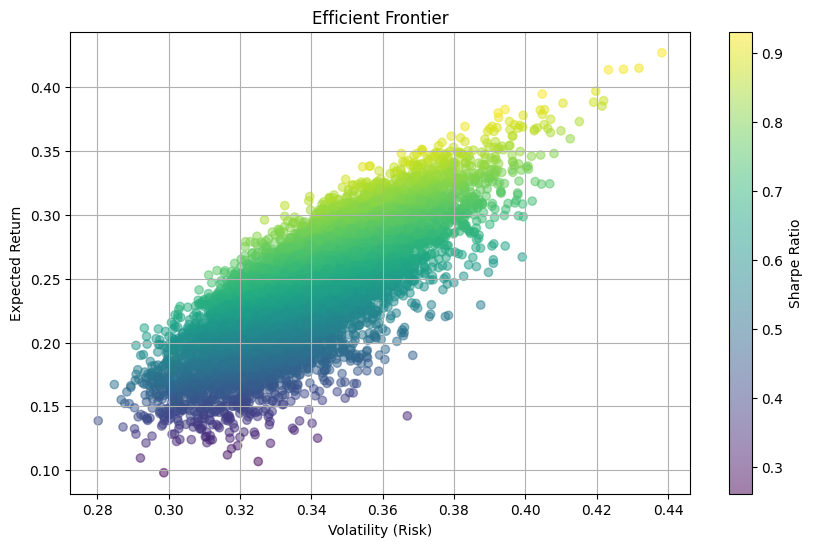

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(results[1], results[0], c=results[2], cmap='viridis', alpha=0.5)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.grid(True)
plt.show()

The Sharpe Ratio of the Best Portfolio is: 0.9302


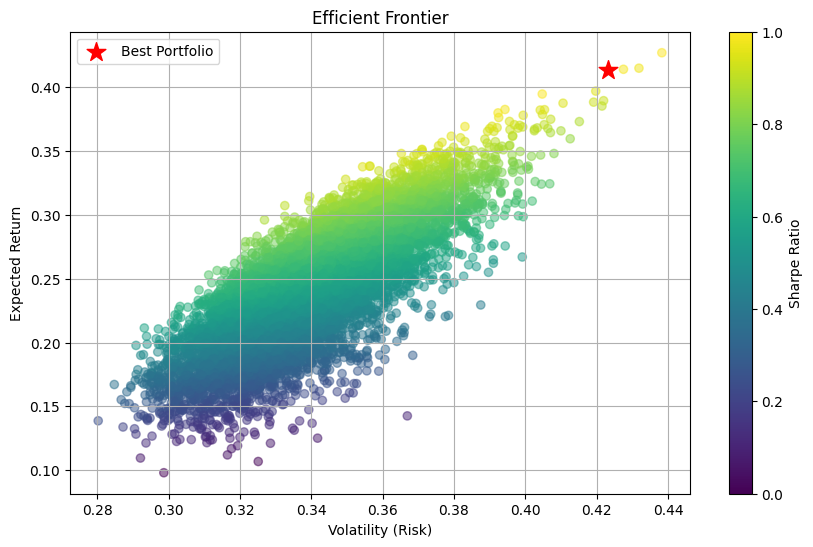

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(results[1], results[0], c=results[2], cmap='viridis', alpha=0.5)

# Find the portfolio with the highest Sharpe ratio
best_sharpe_idx = np.argmax(results[2])

# Highlight the portfolio with the highest Sharpe ratio
plt.scatter(results[1][best_sharpe_idx], results[0][best_sharpe_idx], color='red', marker='*', s=200, label='Best Portfolio')

# Print the Sharpe ratio of the best portfolio
best_sharpe_ratio = results[2][best_sharpe_idx]
print(f"The Sharpe Ratio of the Best Portfolio is: {best_sharpe_ratio:.4f}")

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.grid(True)
plt.legend(loc='upper left')
plt.show()

In [ ]:
max_sharpe_idx = np.argmax(results[2])

# Get the optimal weights corresponding to that portfolio
optimal_weights = weights_record[max_sharpe_idx]

# Print the best portfolio allocation (max Sharpe ratio)
print("Best Portfolio Allocation (Max Sharpe Ratio):")
for i, ticker in enumerate(tickers):
    print(f"{ticker}: {optimal_weights[i]*100:.2f}%")

Best Portfolio Allocation (Max Sharpe Ratio):
AAPL: 8.07%
MSFT: 5.02%
GOOG: 10.11%
AMZN: 5.24%
BRK-B: 11.43%
TSLA: 5.13%
NVDA: 3.75%
KMX: 13.81%
F: 37.44%
